<a href="https://colab.research.google.com/github/GodaBac/BachelorThesis/blob/main/SARIMA/SARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 11.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from pmdarima import auto_arima

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import csv
from datetime import datetime

input_file_path = '/content/drive/MyDrive/Bakalauras/duomenys.csv'

# Open the input CSV file
with open(input_file_path, 'r') as input_file:
    reader = csv.reader(input_file)

    value_names = next(reader)

    # Create an empty list to store the updated rows
    updated_rows = []

    # Loop through each row in the input file
    for row in reader:
         # Try to parse the date string as a datetime object
        try:
            date_str = row[0]
            date_obj = datetime.strptime(date_str, '%d-%m-%Y')
        except ValueError:
            # If the date string is not in the expected format, skip this row
            continue

        # Format the date object as a string in the new format
        new_date_str = date_obj.strftime('%Y-%m-%d')

        # Update the date value in the row
        row[0] = new_date_str
        # Append the updated row to the list of updated rows
        updated_rows.append(row)

# Convert the list of updated rows to a dataframe
df = pd.DataFrame(updated_rows, columns=value_names)

In [ ]:
# Convert the date column to a datetime object
df['DT'] = pd.to_datetime(df['DT'], format='%Y-%m-%d')

# Set the date column as the index of the dataframe
df.set_index('DT', inplace=True)
df['ANTAL_01'] = df['ANTAL_01'].astype(int)
df = df.iloc[::-1]

In [ ]:
#training and test
training = df.dropna().iloc[:-16,:]
test = df.dropna().iloc[-16:, :]

In [ ]:
#SARIMA model
smodel = auto_arima(training, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=5,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[5] intercept   : AIC=28785.487, Time=11.12 sec
 ARIMA(0,0,0)(0,1,0)[5] intercept   : AIC=30419.785, Time=0.15 sec
 ARIMA(1,0,0)(1,1,0)[5] intercept   : AIC=28950.391, Time=4.43 sec
 ARIMA(0,0,1)(0,1,1)[5] intercept   : AIC=29400.520, Time=6.62 sec
 ARIMA(0,0,0)(0,1,0)[5]             : AIC=30420.173, Time=0.17 sec
 ARIMA(1,0,1)(0,1,0)[5] intercept   : AIC=29351.170, Time=3.36 sec
 ARIMA(1,0,1)(1,1,1)[5] intercept   : AIC=28786.553, Time=6.65 sec
 ARIMA(1,0,1)(0,1,2)[5] intercept   : AIC=28786.205, Time=11.05 sec
 ARIMA(1,0,1)(1,1,0)[5] intercept   : AIC=28927.562, Time=2.75 sec
 ARIMA(1,0,1)(1,1,2)[5] intercept   : AIC=28789.188, Time=15.74 sec
 ARIMA(1,0,0)(0,1,1)[5] intercept   : AIC=28785.025, Time=3.73 sec
 ARIMA(1,0,0)(0,1,0)[5] intercept   : AIC=29436.347, Time=1.64 sec
 ARIMA(1,0,0)(1,1,1)[5] intercept   : AIC=28785.969, Time=6.40 sec
 ARIMA(1,0,0)(0,1,2)[5] intercept   : AIC=28786.216, Time=5.28 sec
 ARIMA(1,0,0)(1,

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1802
Model:             SARIMAX(1, 0, 2)x(2, 1, [1], 5)   Log Likelihood              -14307.235
Date:                             Tue, 02 May 2023   AIC                          28630.470
Time:                                     15:55:43   BIC                          28674.421
Sample:                                          0   HQIC                         28646.696
                                            - 1802                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.2367      1.052     -0.225      0.822      -2.299       1.826
ar.L1          0.9728      0.004    221.203      0.000       0.964       0.981
ma.L1         -0.2835      0.007    -42.161      0.000      -0.297      -0.270
ma.L2         -0.3063      0.008    -36.975      0.000      -0.323      -0.290
ar.S.L5       -0.0110      0.010     -1.072      0.284      -0.031       0.009
ar.S.L10      -0.0484      0.007     -7.093      0.000      -0.062      -0.035
ma.S.L5       -0.8883      0.019    -47.450      0.000      -0.925      -0.852
sigma2      4.625e+05   7247.905     63.813      0.000    4.48e+05    4.77e+05
===================================================================================
Ljung-Box (L1) (Q):                  98.34   Jarque-Bera (JB):             29190.96
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.53   Skew:                             2.27
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(training, order=(1,0,2), seasonal_order=(2,1,1,5))
model_fit = model.fit()
yhat = model_fit.forecast()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
#predictions
predictions = pd.Series(smodel.predict(n_periods = len(test)))
predictions.index = test.index
predictions[:5]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


DT
2022-11-30    30996.958222
2022-12-01    30952.777018
2022-12-02    31082.363776
2022-12-05    31131.220784
2022-12-06    31172.019250
dtype: float64

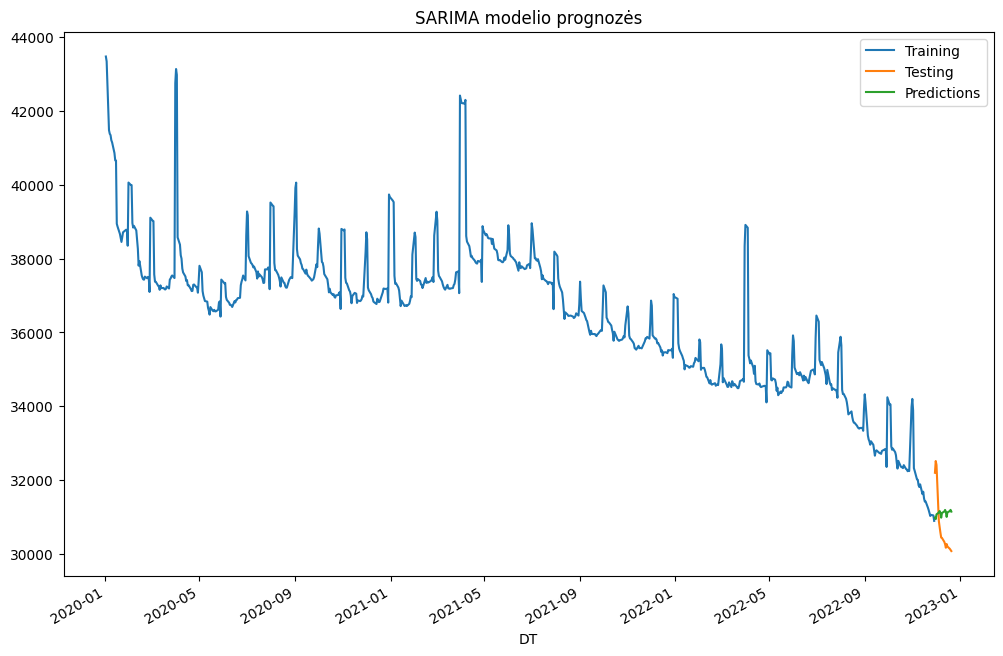

In [ ]:
#Visualization
import matplotlib.pyplot as plt
training['ANTAL_01']['2020-01-01':].plot(figsize=(12, 8), label='Training')
test['ANTAL_01'].plot(label='Testing')
predictions.plot(label='Predictions')
plt.title('SARIMA modelio prognozės')
plt.legend()

In [ ]:
predictions, test

(DT
 2022-11-30    30996.958222
 2022-12-01    30952.777018
 2022-12-02    31082.363776
 2022-12-05    31131.220784
 2022-12-06    31172.019250
 2022-12-07    31126.949014
 2022-12-08    30993.179096
 2022-12-09    31119.701591
 2022-12-12    31159.545142
 2022-12-13    31201.432144
 2022-12-14    31148.707000
 2022-12-15    31013.764568
 2022-12-16    31134.759716
 2022-12-19    31170.985382
 2022-12-20    31203.069436
 2022-12-21    31156.368873
 dtype: float64,
             ANTAL_01
 DT                  
 2022-11-30     32207
 2022-12-01     32524
 2022-12-02     32418
 2022-12-05     30902
 2022-12-06     30743
 2022-12-07     30590
 2022-12-08     30455
 2022-12-09     30444
 2022-12-12     30339
 2022-12-13     30277
 2022-12-14     30179
 2022-12-15     30280
 2022-12-16     30213
 2022-12-19     30152
 2022-12-20     30121
 2022-12-21     30090)